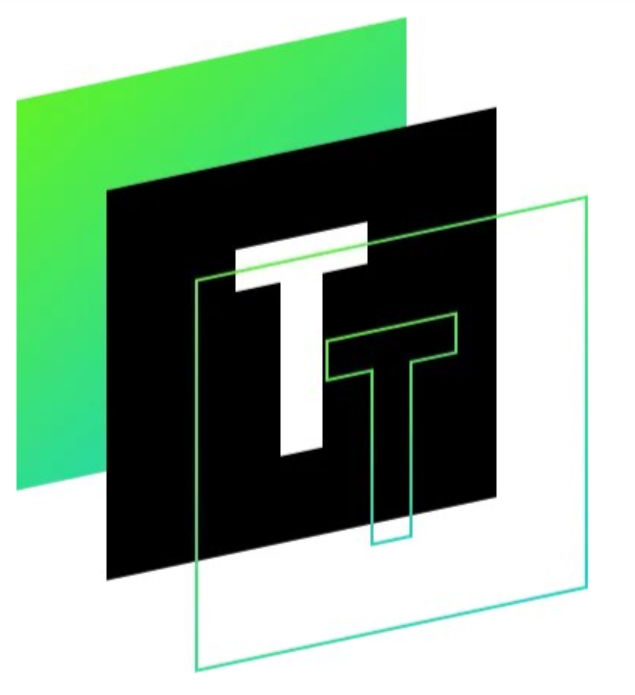

# Aula 3.4 - Data Compression

Fala galera! Tudo bem? Finalmente passamos pela parte mais teórica de machine learning, então agora vamos começar com a prática! A ideia das próximas aulas é trazer exemplos gradativamente mais próximos da realidade de forma a naturalizar vocês em todo o processo de obtenção, manipulação e modelagem de dados, ao mesmo tempo que veremos os principais algoritmos de machine learning. Na aula de hoje, iremos nos deparar com um dataset de vinho!. Para resolver esse problema, veremos que algoritmos de Data Compression, também chamados de Dimensionality Reductions, que são úteis para achar fatores importantes num dataset, além de permitirem a visualização e o agrupamento dos dados. Bora pra aula!

## Introdução

Nos problemas de Machine Learning, geralmente envolve dezenas de milhares de recursos para cada instância de treinamento. Isso pode ser um problema, pois torna nosso treinamento extremamente lento e propenso a 
**OVERFITTING**. Esse problema é comumente referido como a maldição da dimensionalidade.

Devido aos problemas associados à maldição da dimensionalidade, é necessário reduzir consideravelmente o número de recursos por dimensões para ajudar a aumentar o desempenho do nosso modelo e nos permite chegar a uma solução ideal para o nosso modelo de aprendizado de máquina. Felizmente, na maioria dos problemas da vida real, muitas vezes é possível reduzir as dimensões do nosso conjunto de treinamento, sem perder muita variação nos dados.

Por exemplo, alguns de nossos pontos de dados podem ser completamente sem sentido para explicar nossa variável de destino desejada. Como tal, podemos preferir retirá-los de nossa análise. Além disso, é comum que dois pontos de dados possam estar altamente correlacionados entre si; portanto, mesclando-os em um único ponto de dados, você não perderia muita informação.

Ao reduzir as dimensões de nosso conjunto de treinamento, podemos aumentar a velocidade de nosso treinamento e reduzir nosso conjunto de dados para duas ou três dimensões, facilitando a visualização de dados (clustering, padrões).

Para mais informações leia [Supervised Machine Learning — Dimensional Reduction and Principal Component Analysis](https://hackernoon.com/supervised-machine-learning-dimensional-reduction-and-principal-component-analysis-614dec1f6b4c)

## Curse of Dimensionality (Maldição da Dimensionalidade)

A maldição da dimensionalidade se refere a vários fenômenos que surgem ao analisar e organizar dados em espaços de alta dimensão (geralmente com centenas ou milhares de dimensões) que não ocorrem em ambientes de baixa dimensão, como o espaço físico tridimensional da experiência cotidiana. A expressão foi cunhada por Richard E. Bellman ao considerar problemas na programação dinâmica.

Os fenômenos amaldiçoados ocorrem em domínios como análise numérica, amostragem, combinatória, aprendizado de máquina, mineração de dados e bancos de dados. O tema comum desses problemas é que, quando a dimensionalidade aumenta, o volume do espaço aumenta tão rapidamente que os dados disponíveis se tornam escassos. Essa escassez é problemática para qualquer método que exija significância estatística. P

ara obter um resultado estatisticamente sólido e confiável, a quantidade de dados necessária para suportar o resultado geralmente cresce exponencialmente com a dimensionalidade. Além disso, a organização e a pesquisa de dados geralmente dependem da detecção de áreas em que os objetos formam grupos com propriedades semelhantes; em dados de alta dimensão, no entanto, todos os objetos parecem esparsos e diferentes de várias maneiras, o que impede que estratégias comuns de organização de dados sejam eficientes.

Para mais informações leia [Course of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality#targetText=Cursed%20phenomena%20occur%20in%20domains,the%20available%20data%20become%20sparse.)


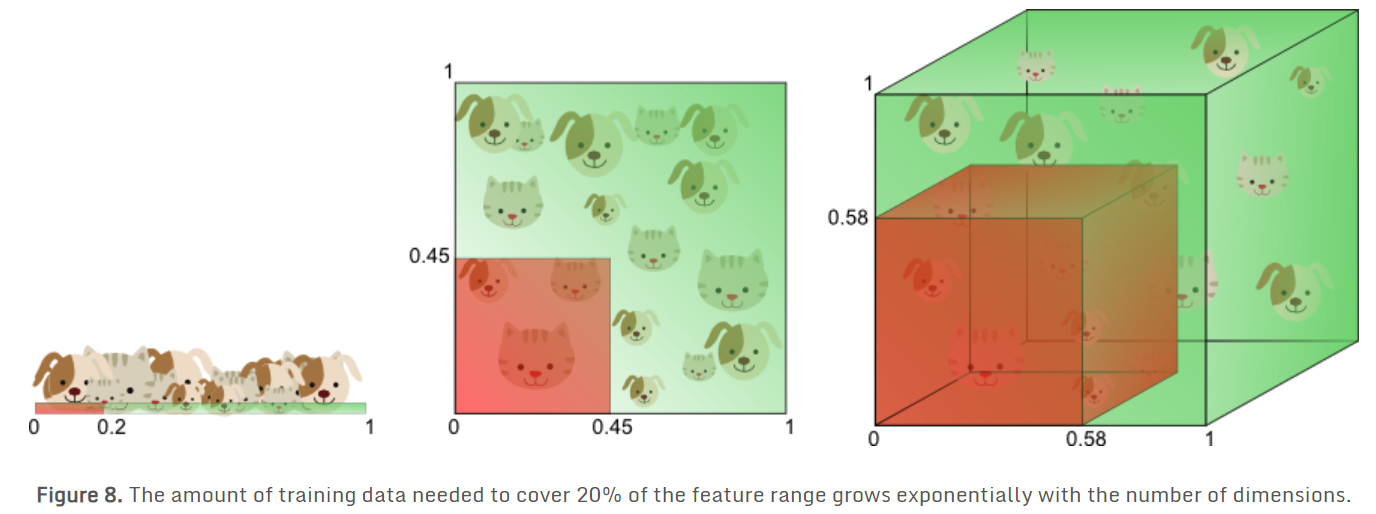

# Principal Component Analysis (PCA)

A idéia principal da análise de componentes principais (PCA) é reduzir a dimensionalidade de um conjunto de dados que consiste em muitas variáveis correlacionadas entre si, de maneira pesada ou leve, mantendo a variação presente no conjunto de dados, até o máximo. O mesmo é feito transformando as variáveis em um novo conjunto de variáveis, conhecidas como componentes principais (ou simplesmente, os PCs) e ortogonais, ordenadas de modo que a retenção da variação presente nas variáveis originais diminua à medida que avançamos na ordem. Assim, o primeiro componente principal retém a variação máxima que estava presente nos componentes originais. Os principais componentes são os autovetores de uma matriz de covariância e, portanto, são ortogonais.

Importante, o conjunto de dados no qual a técnica PCA deve ser usada deve ser escalado. Os resultados também são sensíveis à escala relativa. Como leigo, é um método de resumir dados. Imagine algumas garrafas de vinho em uma mesa de jantar. Cada vinho é descrito por seus atributos como cor, força, idade etc. Mas a redundância surgirá porque muitos deles medem propriedades relacionadas. Portanto, o que a PCA fará neste caso é resumir cada vinho do estoque com menos características.

Intuitivamente, a Análise de Componentes Principais pode fornecer ao usuário uma imagem de dimensão inferior, uma projeção ou "sombra" deste objeto quando vista do seu ponto de vista mais informativo.

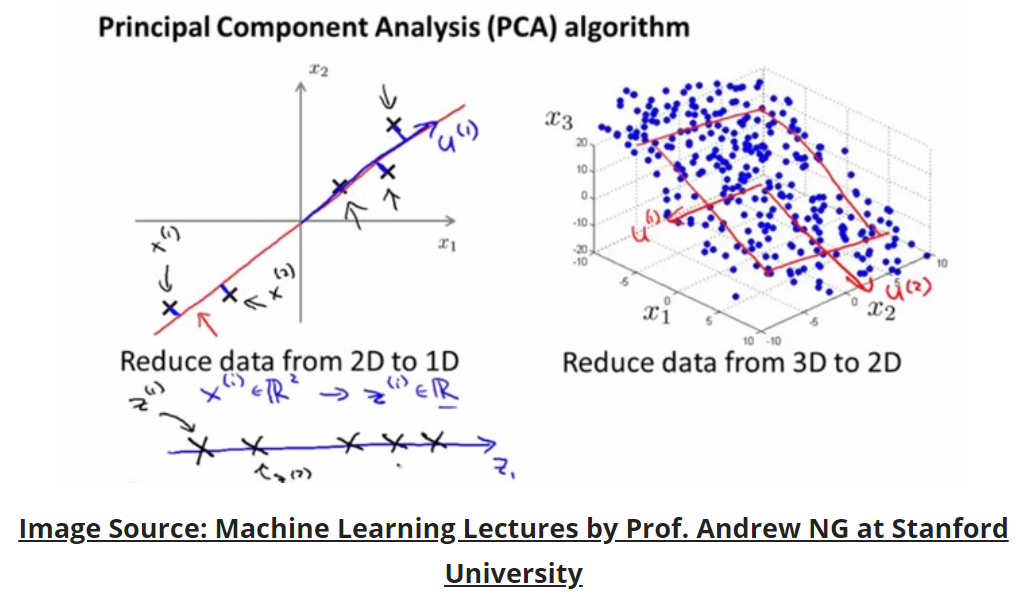



*Fonte da imagem: Palestras de aprendizado de máquina do professor Andrew NG da Universidade de Stanford*

- Dimensionalidade: é o número de variáveis aleatórias em um conjunto de dados ou simplesmente o número de recursos, ou mais simplesmente, o número de colunas presentes no seu conjunto de dados.


- Correlação: Mostra o quão fortemente duas variáveis estão relacionadas uma à outra. O valor dos mesmos intervalos para -1 a +1. Positivo indica que quando uma variável aumenta, a outra também aumenta, enquanto negativo indica que a outra diminui ao aumentar a primeira. E o valor do módulo de indica a força da relação.


- Ortogonal: (obtenha código de amostra) Sem correlação entre si, ou seja, a correlação entre qualquer par de variáveis é 0.


- Autovetores: Os autovetores e os autovalores são, em si, um grande domínio, vamos nos restringir ao conhecimento do mesmo que exigiríamos aqui. Portanto, considere um vetor diferente de zero v. É um vetor próprio de uma matriz quadrada A, se Av for um múltiplo escalar de v. Ou simplesmente: Av = ƛv. Aqui, v é o vetor próprio e ƛ é o valor próprio associado a ele.


- Matriz de covariância: Essa matriz consiste nas covariâncias entre os pares de variáveis. O elemento (i, j) é a covariância entre a variável i-ésima j-ésima.

Para aprofudar mais os conceitos de álgebra linear acesse o canal do YouTube [3Blue!Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw/featured)


## Propriedades do componente principal

Tecnicamente, um componente principal pode ser definido como uma combinação linear de variáveis observadas com o peso ideal. A saída do PCA são esses componentes principais, cujo número é menor ou igual ao número de variáveis originais. Menos, caso desejemos descartar ou reduzir as dimensões em nosso conjunto de dados. Os PCs possuem algumas propriedades úteis listadas abaixo:

- Os PCs são essencialmente as combinações lineares das variáveis originais; o vetor de pesos nessa combinação é na verdade o vetor próprio encontrado, que por sua vez satisfaz o princípio dos mínimos quadrados.


- Os PCs são ortogonais, como já discutido.


- A variação presente nos CPs diminui à medida que passamos do 1º PC para o último, daí a importância.


Às vezes, os PCs menos importantes também são úteis em regressão, detecção de outlier etc.

Para ler mais acesse [Principal Component Analysis Tutorial](https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial)

## Benefícios do PCA

- Combater a Maldição da Dimensionalidade

- Reduzir o Overfit de modelos

- Extratir as variáveis mais explicativas para um modelo de acordo com a variância

- Aumento da densidade dos dados

## Limitações do PCA

- Desempenho do modelo: o PCA pode levar a uma redução no desempenho do modelo em conjuntos de dados sem ou com baixa correlação de recursos ou não atende às premissas de linearidade.

- Precisão da classificação: A estrutura do PCA baseado em variância não considera as características diferenciadoras das classes. Além disso, as informações que distinguem uma classe da outra podem estar nos componentes de baixa variação e podem ser descartadas.

- Outliers: o PCA também é afetado por outliers, e a normalização dos dados precisa ser um componente essencial de qualquer fluxo de trabalho.

- Interpretabilidade: Cada componente principal é uma combinação de recursos originais e não permite que a importância do recurso individual seja reconhecida.

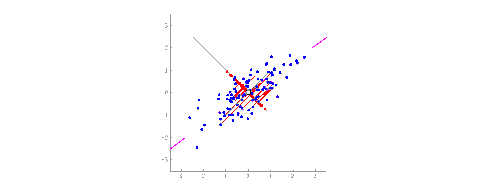

----------------

# Soma de Riemann



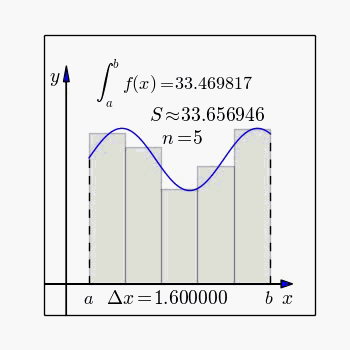

Em matemática, a soma de Riemann é um certo tipo de aproximação de uma integral por uma soma finita. É nomeado em homenagem ao matemático alemão do século XIX Bernhard Riemann. Uma aplicação muito comum é aproximar a área de funções ou linhas em um gráfico, mas também o comprimento de curvas e outras aproximações.

A soma é calculada dividindo a região em formas (retângulos, trapézios, parábolas ou cúbicas) que juntas formam uma região semelhante à região que está sendo medida, calculando a área para cada uma dessas formas e, finalmente, adicionando todas essas pequenas áreas juntas. Essa abordagem pode ser usada para encontrar uma aproximação numérica para uma integral definida, mesmo que o teorema fundamental do cálculo não facilite encontrar uma solução de forma fechada.

Como a região das pequenas formas geralmente não é exatamente da mesma forma que a região que está sendo medida, a soma de Riemann será diferente da área que está sendo medida. Esse erro pode ser reduzido dividindo-se a região mais finamente, usando formas cada vez menores. À medida que as formas ficam cada vez menores, a soma se aproxima da integral de Riemann.


--------------------

## Dica de hoje: Machine Learning @ YouTube

Bom, já que vamos finalmente conhecer os algoritmos de Machine Learning, nada melhor do que passar para vocês algumas recomendações de canais sobre o temaÇ
 - __[Nubank on the Stage](https://www.youtube.com/channel/UC5yS6v2umoIXx8TSJsUEBKg)__: infelizmente os ingressos para os meetups do Nubank acabam em questões de minutos, e muitas vezes não conseguimos aproveitar seus eventos. Pensando nisso, o Nubank um canal no YouTube com as principais talks que já passaram por seu palco.
 - __[StatQuest](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw)__: como o próprio nome diz, esse canal é focado em estatística, e consegue passar conceitos da área com explicações passo a passo. Pra quem precisa de uma revisão em estatística, tá aí uma ótima pedida.
 - __[PyData](https://www.youtube.com/channel/UCOjD18EJYcsBog4IozkF_7w)__: sendo uma das principais conferências mundiais de dados e machine learning, o canal do PyData disponibiliza suas principais talks, que abrangem desde de conceitos teóricos ao uso de ferramentas de dados. Sâo vídeos mais extensos, mas é uma ótima forma de você se manter atualizado sobre o que o ecossistema mundial de dados com Python está fazendo
 - __[Two Minute Papers](https://www.youtube.com/channel/UCbfYPyITQ-7l4upoX8nvctg)__: focado principalmente em algoritmos gráficos, modelos gerativos e aprendizado por reforço, esse canal apresenta e resume alguns dos principais papers lançados.
 


-----------------------
# Exemplo: Wine Type

Vamos trabalhar com um dataset que traz várias características de vinhos, e o tipo de vinho, se é branco ou tinto. O nosso trabalho será tentar prever qual o tipo de vinho e conseguir agrupar os vinhos corretamente.


# Importando as Bibliotecas

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# plotando os gráficos do matplotlib
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

# 1. Lendo e verificando os dados

In [ ]:
# lendo e verificando os dados
df = pd.read_csv('./data/wineanalysis.csv')
df.sample()

In [ ]:
'''
df_wine = pd.read_csv("http://www.dropbox.com/s/bwd47d3hix9tqt9/wineanalysis.csv?dl=1")
df_wine.info()
'''

Algumas coisas a se notar:
 - Há uma coluna chamada Unnamed: 0. Ela está aí pois o dataset foi gravado com seus indexes, portanto é irrelevante para nós
 - Algumas colunas estão nomeadas com um '.' no nome. Isso não é interessante, pois pode confundir o Pandas


Com base nos pontos acima, o que você faria com o dataset? Use a célula abaixo para realizar suas operações.

### Como eliminar a coluna Unnamed e renomear as colunas com valores contínuos

In [ ]:
# Seu código aqui:



In [ ]:
%load solutions/solution_00.py

Legal, agora temos um dataset melhor. Vamos puxar o método `.head()`  para entende-lo melhor

In [ ]:
# verificando o DataFrame
df.head()

In [ ]:
df.info()

### Verificando a variável type

In [ ]:
df.type.value_counts()

Abaixo, vamos analisar o spread de observações entre tipos de vinho. Faça um `.groupby()` por tipo e selecione alguma coluna para contar suas linhas:

### Como verificar o balanceamento dos dados por groupby

Tente fazer o código com groupby para var a contagem dos dados para cada tipo de vinho. Para a documentação oficial acesse [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [ ]:
# Seu código aqui:



In [ ]:
%load solutions/solution_01.py

Ok, parece que teremos que balancear o dataset antes de seguir em frente. Na célula abaixo, faça o balanceamento e aplicação do PCA, passo a passo:

-----------
# 2. Exploratory Data Analysis

Precisamos entender, então, quais features têm impacto sobre *class*. Vamos realizar 2 plots já conhecidos, `pairplot` e `heatmap`:

In [ ]:
# plotando um pairplot para EDA
# Wall time: 43.1 s
%time sns.pairplot(data=df,hue='type', diag_kind='kde',diag_kws={'bw_method':1.5},palette='cool',)

In [ ]:
# matriz de correlação entre todas as variáveis numéricas.
# esse algoritmo só funciona se não tiver campos nulos.
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
%time sns.heatmap(corrmat, vmax=.8, square=True,annot=True,cmap='bwr')

Ok, aqui nos deparamos com um problema: diferente do Iris Dataset, que possui 4 features e plots simples, estamos lidando com um espaço 13-dimensional, com plots mais confusos de analisar. Se formos fazer um feature engineering de modo artesanal e visual como estávamos acostumados, podemos nos perder muito facilmente. Deve haver alguma forma de entender quais features são de fato úteis, ou seja, **carregam a maior quantidade de informação sobre nosso dataset** sem depender se inspeção visual desses plots. Enter Data Compression! <br>


Podemos pensar no nosso dataset como um tensor, um conjunto de features no qual cada uma delas carrega uma quantidade de informação sobre a distribuição de dados nele. Em casos bi ou tri dimensionais, conseguimos facilmente representar esse dataset em plots e tomar decisões em cima deles. 


Porém, de 4-dimensional em diante, isso não é mais possível. Os algoritmos de compressão agem justamente para que possamos projetar nossos dados em dimensṍes menores perdendo o mínimo de informação possível. O primeiro algoritmo que veremos é o PCA (Principal Component Analysis)! <br>


----------------

# 3. Modelagem Preditiva

### Dividindo os dados em X e y

In [ ]:
# verificando as colunas do DataFrame
df.columns

In [ ]:
# dividindo o DataSet em dois componentes
# X: todas as variáveis exceto type
# Y: variável target type
X = df.loc[:, 'fixed_acidity':'quality'].values   # X = df.iloc[:, 1:12].values 
y = df.loc[:, 'type'].values                      # y = df.iloc[:, 0].values

### Dividindo os dados em treino e teste

Tente fazer um código para dividir os dados em treino e teste. Para documentação oficial acesse [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# seu código aqui


In [ ]:
%load solutions/solution_02.py

### Rodando a Regressão Logística

Agora que temos X_train e X_teste transformados, podemos aplicar um modelo categorizador para separar nossas classes. Abaixo, aplique uma regressão logística com random_state = 42. A documentação oficial do LogisticRegression está [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# Seu código aqui


In [ ]:
%load solutions/solution_03.py

### Medindo os resultados

In [ ]:
# plotando a Matriz de Confusão entre os valores reais e preditos

# importando a biblioteca
from sklearn.metrics import confusion_matrix 
# plotando a matriz
cm = confusion_matrix(y_test, y_pred) 
cm

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

## Resumo dos resultados da Regressão Logística

De um total de 959 vinhos brancos, o algorítmo acertou 948 e errou 11. 

De um total de 341 vinhos tintos, o algorítmo acertou 317 e errou 24.

-------------

# Aplicando o Feature Importance na Regressão Logística

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': df.loc[:, 'fixed_acidity':'quality'].columns,
    'Importance': classifier.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=True)

In [ ]:
plt.barh(y=importances['Attribute'], width=importances['Importance'], color='orange')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show

## Selecionando as variáveis mais importantes

In [ ]:
df.columns

In [ ]:
# dividindo o DataSet em dois componentes
X_var = df[['volatile_acidity','sulphates','citric_acid','density','chlorides','pH','fixed_acidity']].values

## Rodando a Regressão Logística com as colunas mais importantes

In [ ]:
# dividindo os dados  
X_train, X_test, y_train, y_test = train_test_split(X_var, y, test_size = 0.2, random_state = 42) 

In [ ]:
%%time
# ajustando o modelo
classifier.fit(X_train, y_train) 

In [ ]:
y_pred = classifier.predict(X_test) 

In [ ]:
# plotando a matriz
cm_fi = confusion_matrix(y_test, y_pred) 
cm_fi

In [ ]:
print(classification_report(y_test, y_pred))

## Resumo dos resultados da Regressão Logística com as colunas mais importantes

De um total de 959 vinhos brancos, o algorítmo acertou 941 e errou 18. 

De um total de 341 vinhos tintos, o algorítmo acertou 310 e errou 31.

#### Isto representa um resultado inferior ao modelo anterior

-------

# 4. Aplicando o PCA 

Para documentação oficial acesse [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

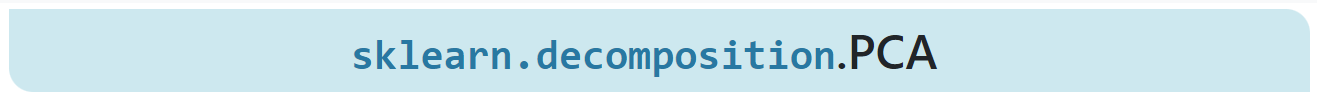

Caso você esteja consultando esse material ou perdeu essa aula, veja __[esse vídeo](https://www.youtube.com/watch?v=FgakZw6K1QQ&t=3s)__ ao invés da explicação ao vivo. A ideia do PCA é descobrir quais features carregam mais informação ao entender em quais desses features há uma maior variância (no caso, esse conceito estará relacionado aos seus autovalores). Ao descobrir quais features são esses, o PCA **projeta** seus dados seguindo os eixos de transformação. Vamos implementá-lo.

## 4.1. PCA com 2 componentes

In [ ]:
# importando as bibliotecas
from sklearn.preprocessing import StandardScaler 
# instanciando a variável
sc = StandardScaler() 
# ajustando com os dados de treino
X = sc.fit_transform(X) 

In [ ]:
X.shape

In [ ]:
# Aplicando o PCA

# importando as bibliotecas
from sklearn.decomposition import PCA
# instanciando o modelo
model_pca2 = PCA(n_components = 2)
# ajustando com os dados de treino
X_pca2 = model_pca2.fit_transform(X)

In [ ]:
df_pca2 = pd.DataFrame(X_pca2,columns=['pca_1','pca_2'])
df_pca2['type'] = df['type']
df_pca2.tail()

### Plot com Seaborn

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="pca_1", y="pca_2", data=df_pca2, hue='type',\
                     palette=['red','blue'], s=50, alpha=.5)

## 4.2. PCA com 3 componentes

In [ ]:
# Aplicando o PCA

# importando as bibliotecas
from sklearn.decomposition import PCA
# instanciando o modelo
model_pca3 = PCA(n_components = 3)
# ajustando e transformando os dados de treino
X_pca3 = model_pca3.fit_transform(X)

In [ ]:
df_pca3 = pd.DataFrame(X_pca3,columns=['pca_1','pca_2','pca_3'])
df_pca3['type'] = df['type']
df_pca3.head()

In [ ]:
df_pca3.type.value_counts()

In [ ]:
df_pca3['type'] = df_pca3['type'].replace(['white'],['blue'])
df_pca3.type.value_counts()

In [ ]:
# Plot initialisation
from mpl_toolkits.mplot3d import Axes3D

my_color=df_pca3['type']
#labels = [df_pca3['pca_1'], df_pca3['pca_2'], df_pca3['pca_3']]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca3['pca_1'], df_pca3['pca_2'], df_pca3['pca_3'], c=my_color, s=50)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(df_pca3['pca_1']), max(df_pca3['pca_1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(df_pca3['pca_2']), max(df_pca3['pca_2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(df_pca3['pca_3']), max(df_pca3['pca_3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")
ax.set_title("PCA on wine data set")
#plt.legend(s.legend_elements()[0], list(set(df_pca3["type"])))
plt.show()


------------

# 5. Medindo os resultados do PCA com 2 dimensões com a Regressão Logística 

#### Vamos entender como o PCA tem a capacidade de reter a informação dos dados originais, medindo a qualidade de predição de uma Regressão Logística sobre dados com dimensão reduzida pelo PCA.

Abaixo, aplique novamente o `train_test_split` em X e y com split de 80-20 e random_state=42. Caso não se lembre de como fazê-lo, leia sua documentação __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__.

In [ ]:
# seu código aqui


In [ ]:
%load solutions/solution_04.py

Abaixo, aplique o `Standard Scaler` em *X_train* e *X_test*. Isso é necessário pois, como o PCA calcula distâncias, precisamos nos certificar que todos os features estão na mesma escala para evitar enviesamento. Caso não lembre de como fazê-lo, leia sua documentação __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)__.

In [ ]:
# seu código aqui


In [ ]:
%load solutions/solution_05.py

Agora que temos nossos dados na mesma escala, vamos aplicar o PCA. Ele está localizado no módulo de *decomposition* do scikit-learn. Como sempre, vamos importar o modelo, instanciá-lo com os hiperparâmetros desejados, realizar o fitting-transform e analisar sua transformação. Nesse caso, chamamos de fit-transform e transform ao invés de fit e prediction pois estamos transoformando (no caso, projetando) nossos dados. Na célula abaixo, aplique um PCA com 2 componentes: ajuste e transformação no X_train e somente transformação no X_test. Para documentação oficial [clique aqui](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [ ]:
# seu código aqui


In [ ]:
%load solutions/solution_06.py

In [ ]:
# verificando o tamanho dos dados de treino
X_train.shape,X_train_pca.shape

In [ ]:
# verificando o tamanho dos dados de teste
X_test.shape,X_test_pca.shape

### Rodando a Regressão Logística

Agora que temos X_train e X_teste transformados, podemos aplicar um modelo categorizador para separar nossas classes. Abaixo, aplique uma regressão logística com random_state = 42. A documentação oficial do LogisticRegression está [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# Seu código aqui


In [ ]:
%load solutions/solution_07.py

### Medindo os resultados

In [ ]:
# plotando a Matriz de Confusão entre os valores reais e preditos

# importando a biblioteca
from sklearn.metrics import confusion_matrix 
# plotando a matriz
cm_pca2 = confusion_matrix(y_test, y_pred) 
cm_pca2

In [ ]:
print(classification_report(y_test, y_pred))

## Resumo dos resultados da Regressão Logística com PCA de 2 dimensões

- De um total de 959 vinhos brancos, o algorítmo acertou 949 e errou 10. 

- De um total de 341 vinhos tintos, o algorítmo acertou 325 e errou 16.

#### Isto significa que os resultados com o PCA foram melhores que os originais

------------

# 6. Estudando as variâncias dos componentes, com PCA de 2 dimensões

Para aprofundar o entendimento do PCA, vamos valcular as variâncias entre seus componentes através da matriz de dados reconstruída, que volta ao número de dimensões originais, no nosso caso 13 dimensões. Depois disso, calculamos a perda na variância dos dados por conta do processo de compressão.

In [ ]:
# Variance from reconstructed data
# voltando para 13 dimensioanl
reconstruct2 = model_pca2.inverse_transform(X_pca2)
# diferença dos dados originais e reconstruídos
differenceMatrix = X - reconstruct2
# variância não explicada
differenceMatrix.var()

A perda de variância com a reconstrução do PCA foi de 0.45

In [ ]:
# Information loss
# complementar da variância não explicada
model_pca2.noise_variance_

O módulo `noise_variance_` calcula a variância média perdida por dimensão descartada. O valor do `noise_variance_` é igual à média de (min (n_features, n_samples) - n_components) menores autovalores (eingenvalues) da matriz de covariância de X.


Para mais informaçõers acesse o item 3.2.2. Noise Variance do artigo [Mixtures of Probabilistic
Principal Component Analysers](http://www.miketipping.com/papers/met-mppca.pdf)

## 6.1. Visualizando a direção da máxima variância captada em cada componente do PCA por variável original 

In [ ]:
# PCA data
# dados das componentes dos dados comprimidos
print(model_pca2.components_)

Eixos principais no espaço das features, representando as direções de variância máxima nos dados. Os componentes são classificados por `explained_variance_`. A quantidade de variância explicada por cada um dos componentes selecionados. É igual a n_componentes maiores autovalores da matriz de covariância de X.

In [ ]:
# Componentes vetoriais de cada feature original para cada eixo do PCA
# plot do gráfico
plt.figure(figsize=(16, 4))
# plot do heatmap
sns.heatmap(model_pca2.components_, cmap="Blues_r", cbar=False, annot=True, xticklabels=df.iloc[:, 1:13].columns)

## 6.2. Calculando a `explained_variance` para cada um dos componentes:

In [ ]:
# cálculo da variância explicada para as duas componentes PCA do modelo
model_pca2.explained_variance_

### Considerando a variância como uma TAXA

In [ ]:
# calculando a quantidade de informação do primeiro componente
PCA1 = model_pca2.explained_variance_[0] / (pca.explained_variance_[0] + pca.explained_variance_[1])
PCA1

In [ ]:
# calculando a quantidade de informação do segundo componente
PCA2 = model_pca2.explained_variance_[1] / (model_pca2.explained_variance_[0] + model_pca2.explained_variance_[1])
PCA2

In [ ]:
# verificação visual das quantidades de informação por componente
plt.bar(x=['PCA1','PCA2'],height=[PCA1,PCA2])

## Estudando a `explained_variance` graficamente

In [ ]:
# Gráfico da variância acumulada

plt.bar(x=range(1,len(model_pca2.explained_variance_ )+1),height=model_pca2.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(model_pca2.explained_variance_ )+1),
         np.cumsum(model_pca2.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

-------------------

# 7. PCA - como escolher o número de componentes?


Nesta sessão, será mostrado como escolher o número de componentes principais ao usar a análise de componentes principais para redução de dimensionalidade.

Primeiro, o algoritmo PCA vai padronizar o quadro de dados de entrada, e calcular a matriz de covariância dos recursos.

Agora, vamos tentar imaginar que todo valor da matriz de covariância é um vetor. Esse vetor indica uma direção no espaço n-dimensional (n é o número de recursos no quadro de dados original). O que é um vetor? Podemos imaginar isso como uma “flecha” apontando em alguma direção naquele espaço n-dimensional.

Esses vetores podem ser “calculados em média” gerando outro vetor que “aponta” mais ou menos na mesma direção que todos esses vetores em média. Chamamos isso de *enginvectors*. Ele também possui um valor (vamos imaginá-lo como um "comprimento" da "seta") que está correlacionado com o número de vetores calculados pela média do *enginvector*.

Depois disso, classificamos os *enginvectors* por seus *enginvalues*. Lembre-se de que já escolhemos o ponto de corte (a variação desejada que deve ser explicada pelos componentes principais). Isso significa que podemos selecionar os vetores próprios que somam o limite desejado da variação explicada.

Agora, multiplicamos o quadro de dados do recurso padronizado pela matriz dos componentes principais e, como resultado, obtemos a representação compactada dos dados de entrada.

## 7.1. Como selecionar o número de componentes

Agora, sabemos que os principais componentes explicam uma parte da variação. Na implementação do Scikit-learn, podemos obter as informações sobre a variação explicada e plotar a variação cumulativa

In [ ]:
# verificando os dados
df.info()

In [ ]:
# verificando a variável target
df.type.value_counts()

In [ ]:
# substituindo os valores em string (red,white) para numéricos (0,1)
df['type']=np.where(df['type']=='white',0,1)
df.type.value_counts()

In [ ]:
# colocando todos os dados na mesma escala
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df)

In [ ]:
# selecionando 99% de variância
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [ ]:
# verificando os valores de variância
pca.explained_variance_

In [ ]:
# plot da variância para cada componente e o valor acumulado
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [ ]:
# visualização do número de componentes para um limite de 95% de variância explicada

pca = PCA().fit(data_rescaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Podemos escolher um THRESHOLD limite para reter a variância de um DataSet em caso de OVERFIT, e pensar que esta operação poderá eliminar viés dos dados e permitir uma melhor predição para dados desconhecidos.

------------------------------

# t-SNE

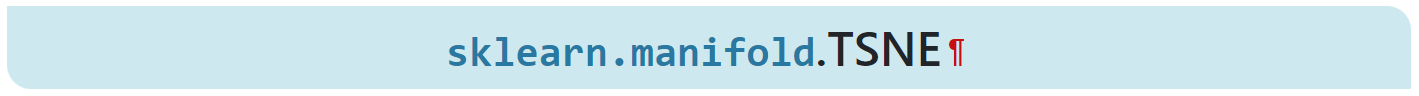

Aplicação do t-SNE: t-distribution Stochastic Neighborhood Embedding - para documentação oficial acesse [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [ ]:
%%time
# aplicação do t-SNE de 2 dimensões nos dados de entrada
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=1)
X_tsne = tsne.fit_transform(X)

In [ ]:
# definição de un DataFrame com os dados do t-SNE e a variável target
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1','tsne2'])
df_tsne['type']=df.type
df_tsne.head()

In [ ]:
# visualização dos resultados
ax = sns.scatterplot(x="tsne1", y="tsne2", data=df_tsne, hue='type',\
                     palette=['red','blue'], s=50, alpha=.5)

### Rodando a Regressão Logística

Agora que temos X_train e X_teste transformados, podemos aplicar um modelo categorizador para separar nossas classes. Abaixo, aplique uma regressão logística com random_state = 42. A documentação oficial do LogisticRegression está [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# array com os dados de entrada
X_tsne=df_tsne[['tsne1','tsne2']].values

In [ ]:
# verificação do tamamnho dos dados
# de entrada e da variável target
X_tsne.shape, df.type.shape

In [ ]:
# aplicando o split doa dados 
X_train, X_test, y_train, y_test = train_test_split(X_tsne, df.type, test_size = 0.2, random_state = 42) 

In [ ]:
# aplicando o Standard Scaler nos dados de entrada de treino e teste 
# ajustando com os dados de treino
X_train = sc.fit_transform(X_train) 
# transformando os dados de teste
X_test = sc.transform(X_test) 

In [ ]:
# instanciando o modelo 
classifier = LogisticRegression(random_state = 1)
# ajustando o modelo
classifier.fit(X_train, y_train) 
# predição de valores com dados de teste com a Regressão Logística
y_pred = classifier.predict(X_test) 

### Medindo os resultados

In [ ]:
# plotando a Matriz de Confusão entre os valores reais e preditos

# importando a biblioteca
from sklearn.metrics import confusion_matrix 
# plotando a matriz
cm_tsne = confusion_matrix(y_test, y_pred) 
cm_tsne

In [ ]:
print(classification_report(y_test, y_pred))

## Resumo dos resultados da Regressão Logística com t-SNE

- De um total de 959 vinhos brancos, o algorítmo acertou 952 e errou 7. 

- De um total de 341 vinhos tintos, o algorítmo acertou 332 e errou 9.

#### Estes resultados são ainda melhores

----------------------

# UMAP

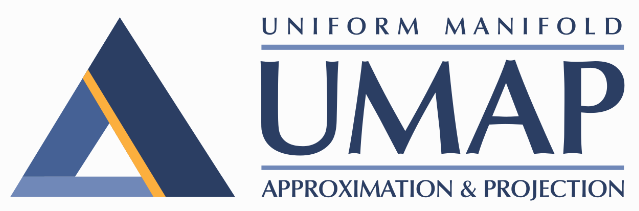

Aplicando o UMAP: Uniform Manifold Approximation and Projection - para documentação oficial acesse [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/index.html)

In [ ]:
# dividindo o DataSet em dois componentes
# X: todas as variáveis exceto type
# Y: variável target type
X_umap = df.loc[:, 'fixed_acidity':'quality'].values   # X = df.iloc[:, 1:12].values 
y_umap = df.loc[:, 'type'].values               # y = df.iloc[:, 0].values

In [ ]:
# instanciando a variável
sc = StandardScaler() 
# ajustando com os dados de treino
X_umap_scaled = sc.fit_transform(X_umap) 

In [ ]:
# verificação do tamanho dos dados de entrada
X_umap_scaled.shape

In [ ]:
# aplicação do modelo
import umap
reducer = umap.UMAP()

In [ ]:
%%time
# aplicação do modelo
embedding = reducer.fit_transform(X_umap_scaled,)
embedding.shape

In [ ]:
# definição de um DataFrame com das variáveis do modelo e a variável target
df_umap = pd.DataFrame(embedding, columns=['umap1','umap2'])
df_umap['type']=df.type
df_umap.head()

In [ ]:
# visualização dos resultados do UMAP
ax = sns.scatterplot(x="umap1", y="umap2", data=df_umap, hue='type',\
                     palette=['red','blue'], s=50, alpha=.5)

### Rodando a Regressão Logística

Agora que temos X_train e X_teste transformados, podemos aplicar um modelo categorizador para separar nossas classes. Abaixo, aplique uma regressão logística com random_state = 42. A documentação oficial do LogisticRegression está [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# definição dos dados de entrada em um array
X_umap=df_umap[['umap1','umap2']].values

In [ ]:
# verificação do tamanho dos dados
X_umap.shape, df.type.shape

In [ ]:
# aplicando o trais-test-split
X_train, X_test, y_train, y_test = train_test_split(X_umap, df.type, test_size = 0.2, random_state = 42) 

Abaixo, aplique o `Standard Scaler` em *X_train* e *X_test*. Isso é necessário pois, como o PCA calcula distâncias, precisamos nos certificar que todos os features estão na mesma escala para evitar enviesamento. Caso não lembre de como fazê-lo, leia sua documentação __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)__.

In [ ]:
# ajustando com os dados de treino
X_train = sc.fit_transform(X_train) 
# transformando os dados de teste
X_test = sc.transform(X_test) 

In [ ]:
# instanciando o modelo 
classifier = LogisticRegression(random_state = 1)
# ajustando o modelo
classifier.fit(X_train, y_train) 
# predição de valores com dados de teste com a Regressão Logística
y_pred = classifier.predict(X_test) 

### Medindo os resultados

In [ ]:
# plotando a Matriz de Confusão entre os valores reais e preditos

# importando a biblioteca
from sklearn.metrics import confusion_matrix 
# plotando a matriz
cm_umap = confusion_matrix(y_test, y_pred) 
cm_umap

In [ ]:
print(classification_report(y_test, y_pred))

## Resumo dos resultados da Regressão Logística com UMAP

- De um total de 959 vinhos brancos, o algorítmo acertou 943 e errou 14. 

- De um total de 341 vinhos tintos, o algorítmo acertou 333 e errou 8.

### Estes resultados variam, mas não são melhores que o t-SNE

------------------


# Desafio 1; montar uma tabela com os resultados e escolher o melhor algoritmo incluso: número total de vinho de cada tipo, número de acertos e erros, tempo estimado para rodar cada algoritmo.

-------------------

# Desafio 2: Fazer o mesmo estudo considerando a variável target como `quality`

-------------------

# Desafio 3: Fazer o mesmo estudo para o DataSet `wine.csv` 